In [1]:
# 线性模型也叫作线性支持向量机
# 核支持向量机 SVM 可以推广到更复杂模型的扩展，这些模型无法被输入空间的超平面定义
# 可以让线性模型更加灵活，就是添加更多的特征

Text(0,0.5,'Feature 1')

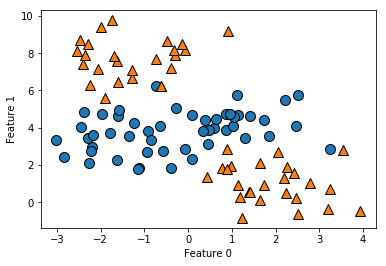

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
X, y = make_blobs(centers=4, random_state=0)
y = y % 2

import mglearn
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

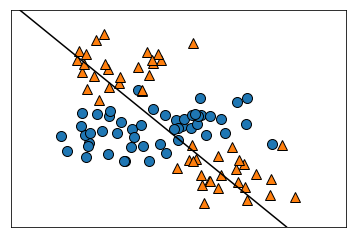

In [4]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)
mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

In [9]:
# 分类的线性模型只能用一条直线来划分数据点
# 现在给数据中加入一个非线性特征，会使得线性模型变得强大
# 但是不知道添加哪些特征
# 核技巧可以使得在更高维的空间中学习分类器，而不用实际计算
# 原理是直接计算扩展特征表示中数据点之间的距离
# 1. 多项式核： 在一定阶数中计算原始特征的所有可能多项式
# 2. 径向基函数核，RBF核，高斯核，考虑所有阶数的所有可能的多项式，但是阶数越高，特征的重要性越低
# SVM学习每个训练数据点对于表示两个类别之间的决策边界的重要性
# 位于类别边界上的点成为支持向量
# 对于新样本点进行预测，需要测量它与每个支持向量之间的距离

In [10]:
# 所以首先确定支持向量，然后确定要预测的点和支持向量的距离

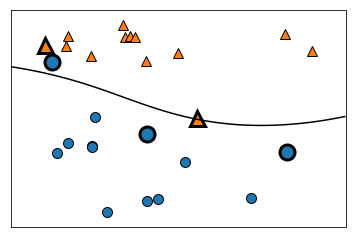

In [11]:
from sklearn.svm import SVC
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel="rbf", C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
sv = svm.support_vectors_
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)

In [12]:
sv

array([[ 8.1062269 ,  4.28695977],
       [ 9.50169345,  1.93824624],
       [11.563957  ,  1.3389402 ],
       [10.24028948,  2.45544401],
       [ 7.99815287,  4.8525051 ]])

In [ ]:
# 其中C参数是，正则化参数，其值越小，表示限制各个点的重要性，这样模型就会变得简单
# C值越大，模型会越复杂

# gamma 用于控制高斯核的宽度，决定了点与点靠近是指多大的距离
# gamma 越大，高斯核宽度越小，模型会越复杂

# 另外SVM对参数的设定和数据的缩放非常敏感